## Classification

In [ ]:
import numpy as np
import pandas as pd
import os
import theano
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files

myfile = files.upload()
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# some columns are totally unproductive so let's remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# some columns have text data so let's one hot encode them
#  for more on one hot encoding click this link below
# https://www.kaggle.com/shrutimechlearn/types-of-regression-and-stats-in-depth
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [ ]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [ ]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
churn_data_encoded = Gender_dummies

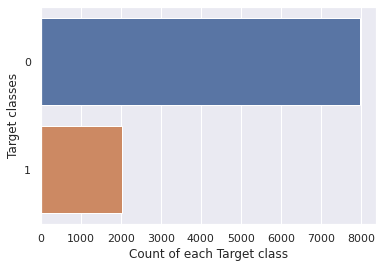

In [ ]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

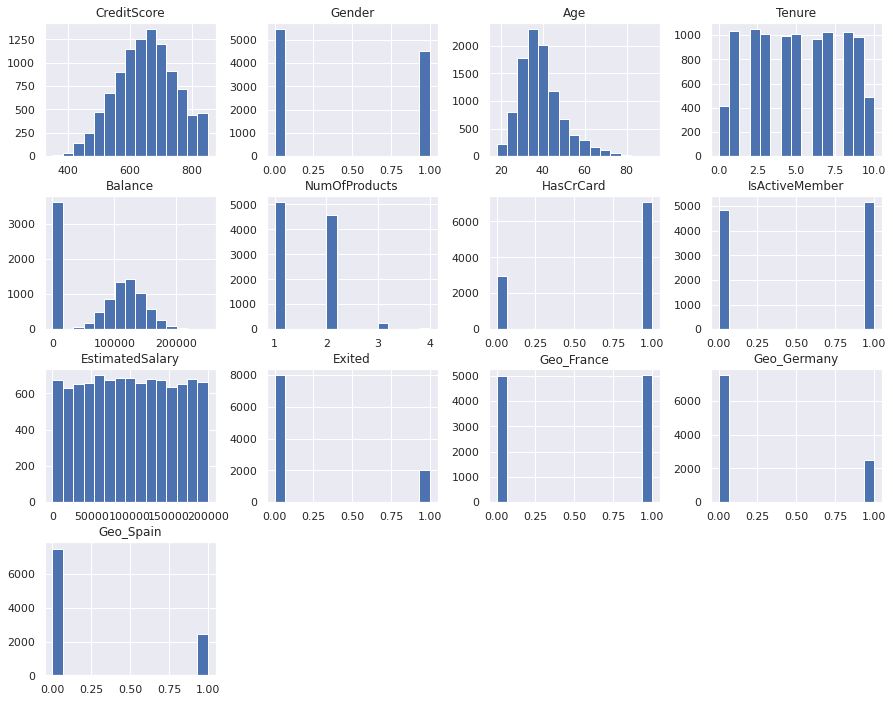

In [ ]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

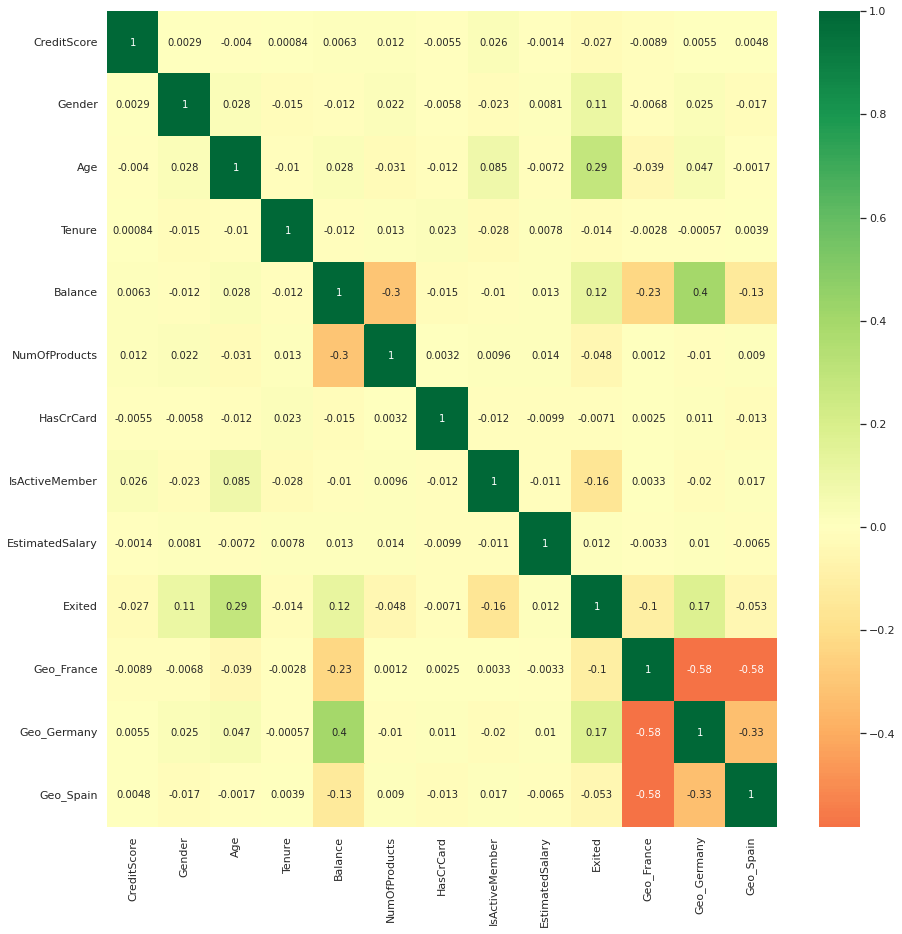

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

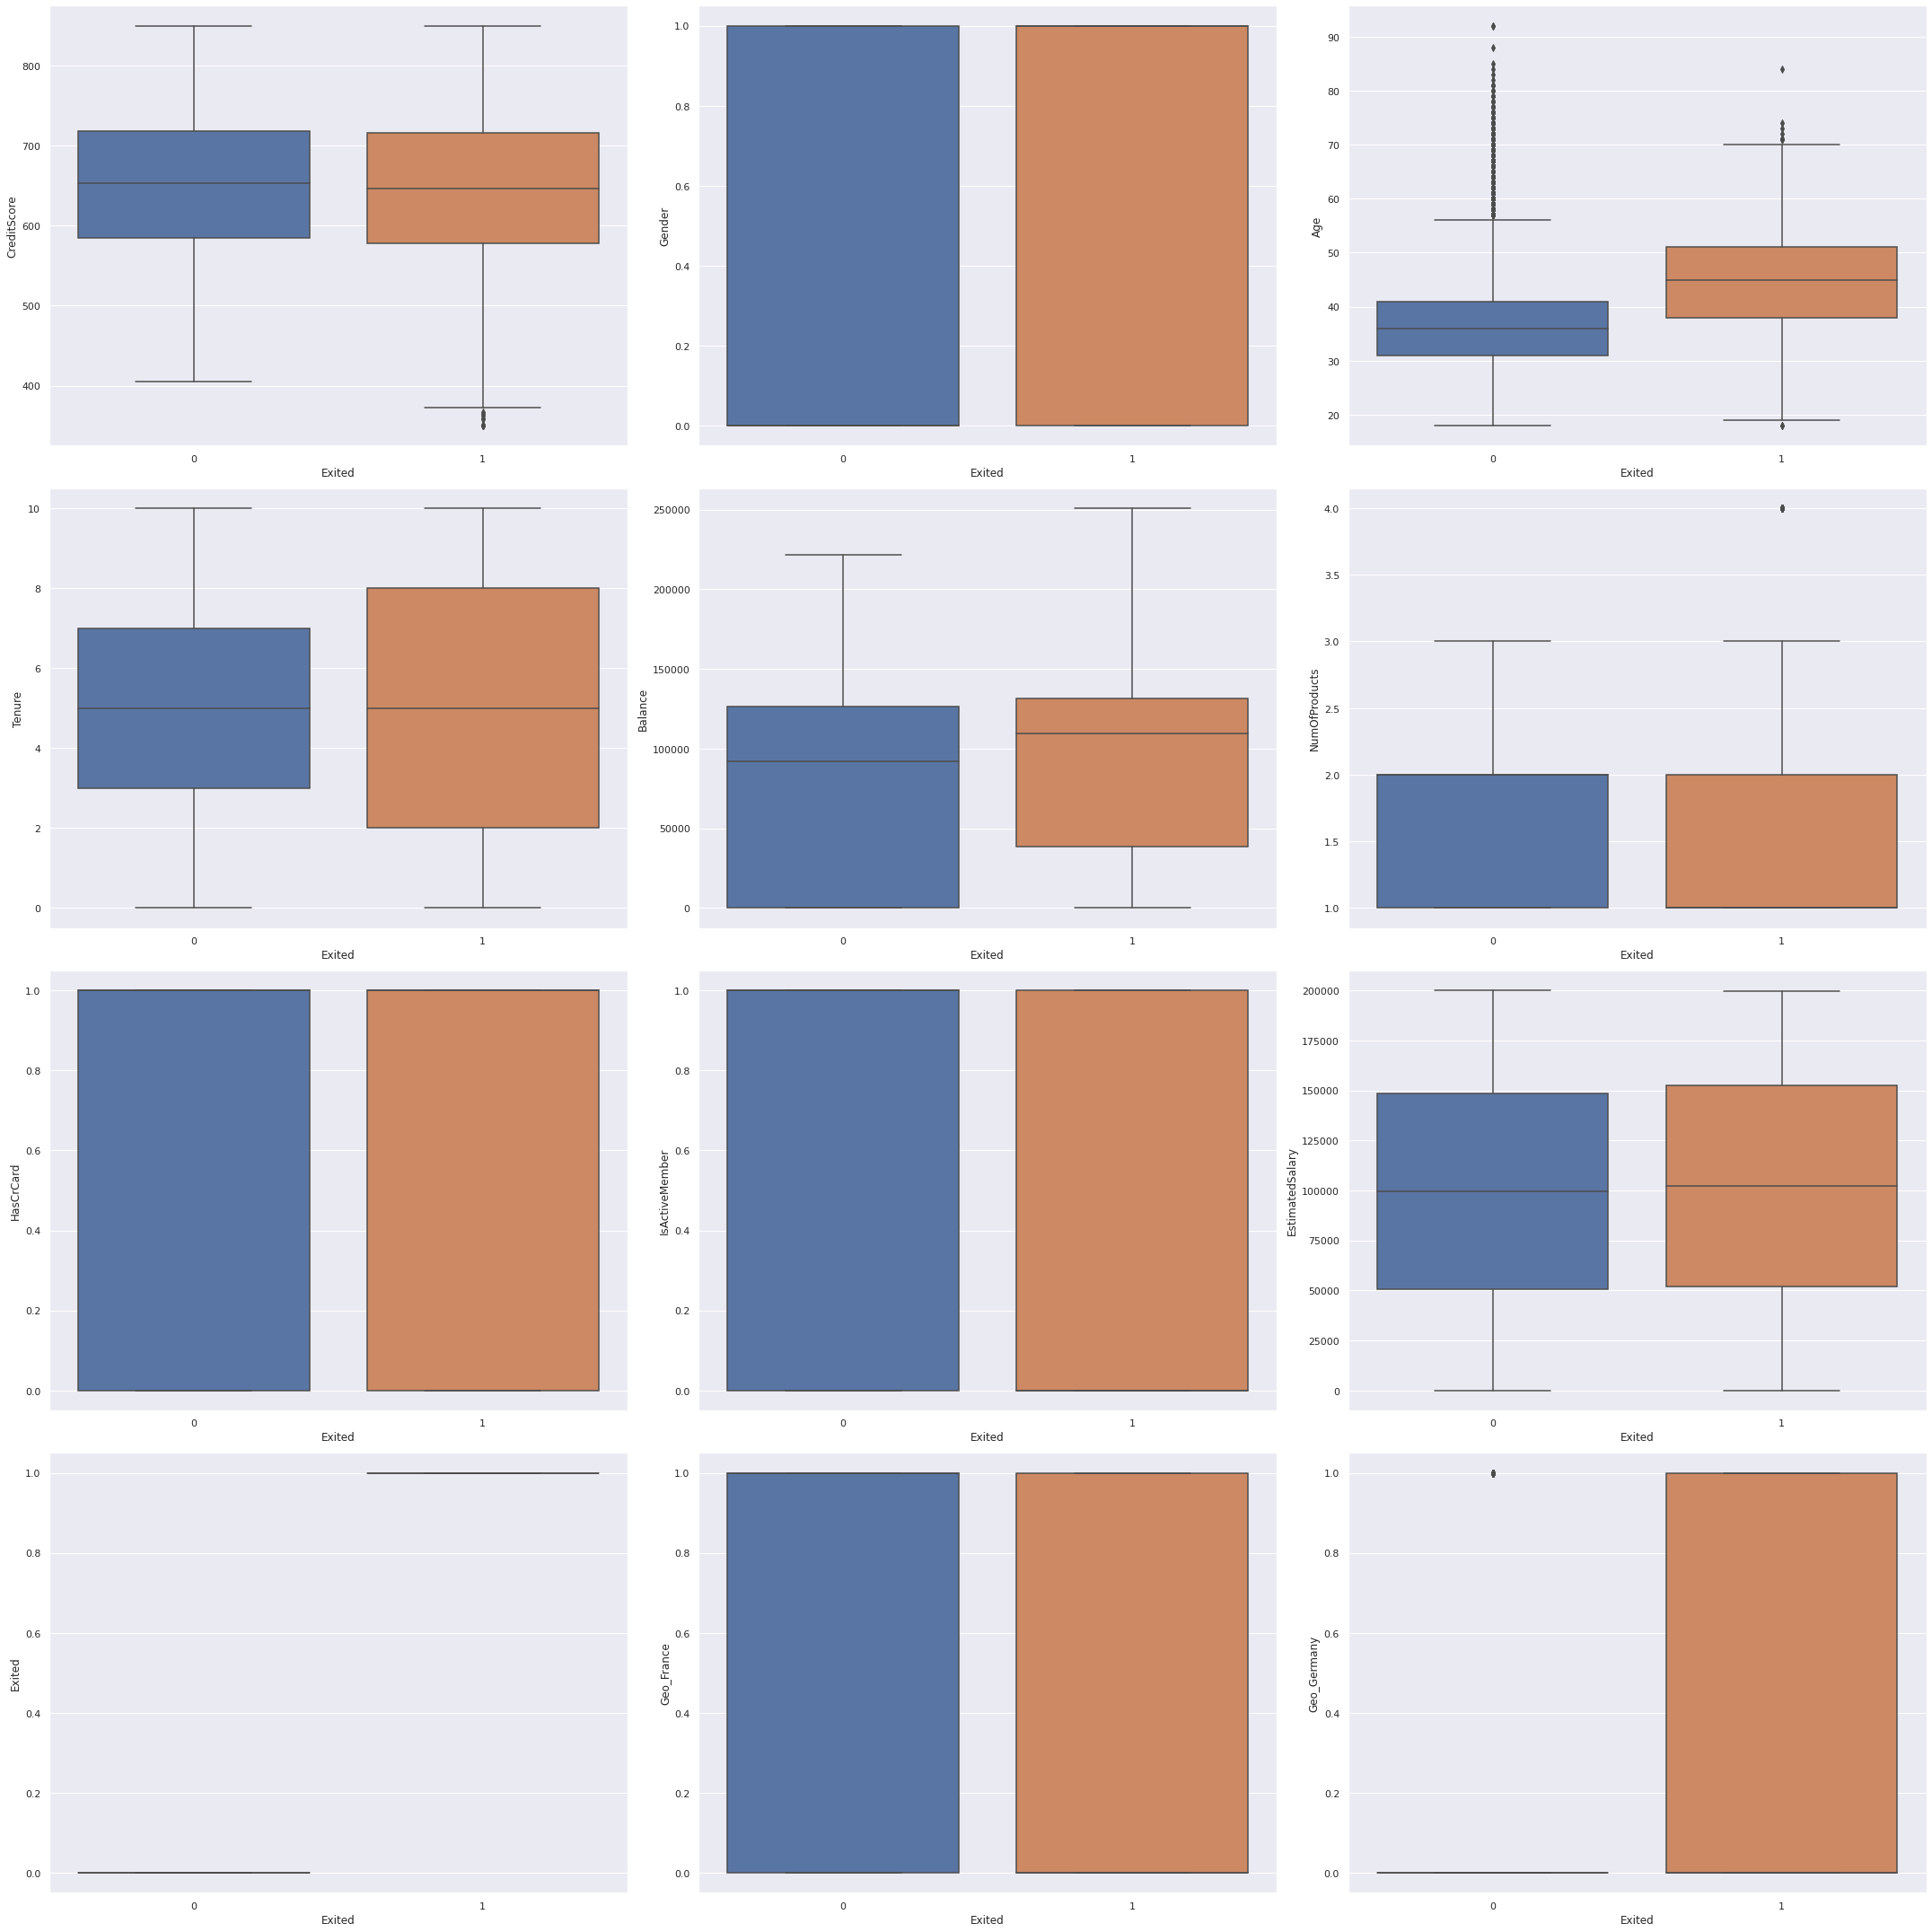

In [ ]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [ ]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [ ]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 12)
(8000,)
(2000, 12)
(2000,)


In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



---



---



---





---



---



---



## 히든 레이어 4개

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
#network.add(layers.Dense(256, activation = 'relu'))
#network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 5ms/step - loss: 0.4037 - accuracy: 0.8316 - val_loss: 0.3790 - val_accuracy: 0.8394 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3609 - accuracy: 0.8505 - val_loss: 0.3813 - val_accuracy: 0.8544 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3518 - accuracy: 0.8552 - val_loss: 0.3613 - val_accuracy: 0.8537 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.8591 - val_loss: 0.3610 - val_accuracy: 0.8550 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8608 - val_loss: 0.3656 - val_accuracy: 0.8512 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8602 - val_loss: 0.3641 - val_accuracy: 0.8575 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3

In [ ]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                832       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


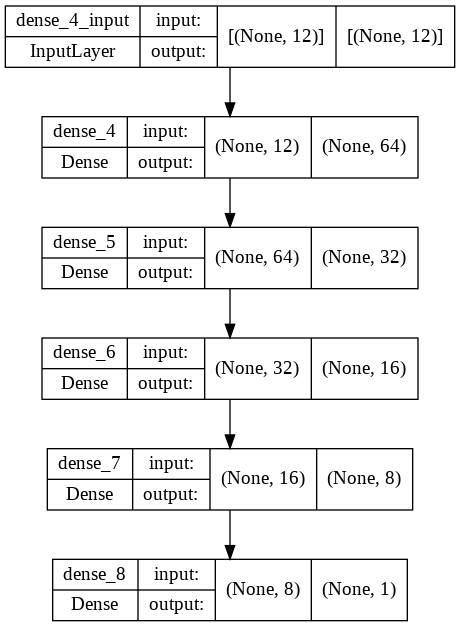

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

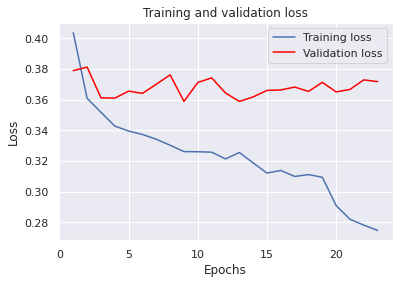

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

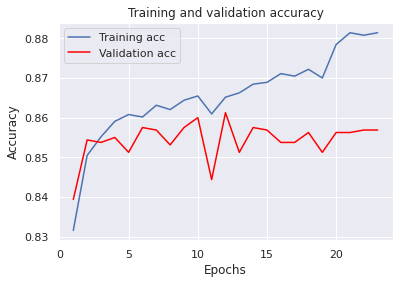

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8545
test loss: 0.3511580526828766
test_accuracy: 0.8544999957084656


Text(0.5, 12.5, 'Predicted label')

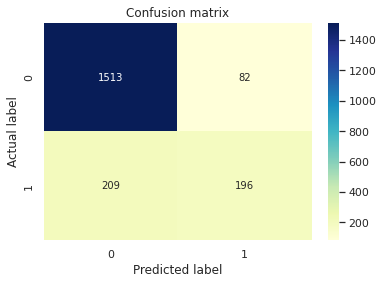

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.48      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



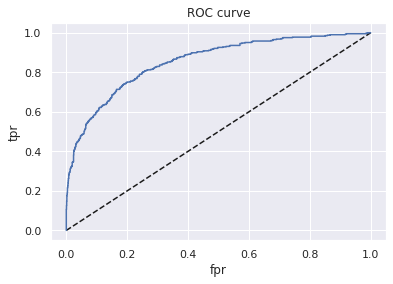

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8544347691474128



---



---



---



## 히든 레이어 6개

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 6ms/step - loss: 0.4243 - accuracy: 0.8122 - val_loss: 0.4425 - val_accuracy: 0.8125 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8403 - val_loss: 0.3649 - val_accuracy: 0.8562 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3571 - accuracy: 0.8533 - val_loss: 0.3813 - val_accuracy: 0.8494 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3465 - accuracy: 0.8580 - val_loss: 0.3632 - val_accuracy: 0.8494 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8611 - val_loss: 0.3622 - val_accuracy: 0.8425 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3386 - accuracy: 0.8595 - val_loss: 0.3565 - val_accuracy: 0.8600 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3

In [ ]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               3328      
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                

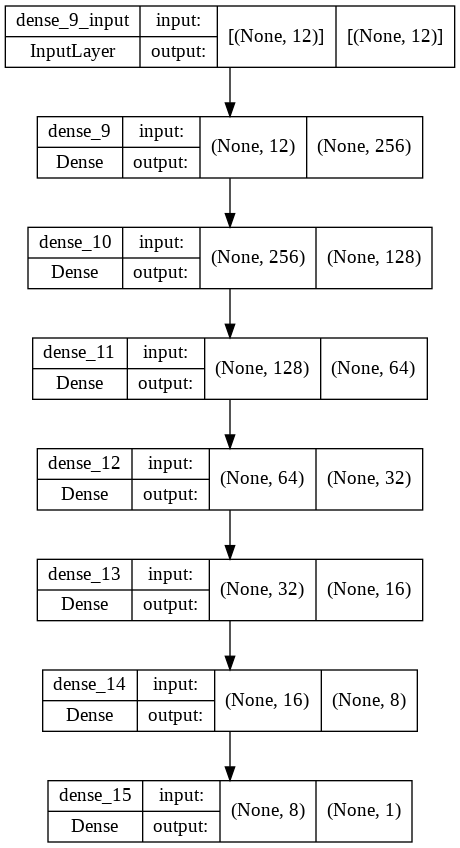

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)


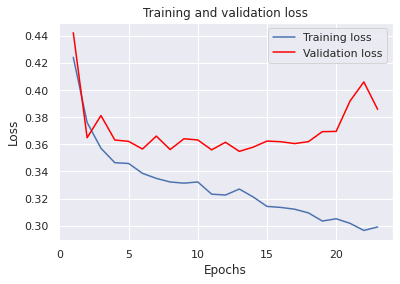

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


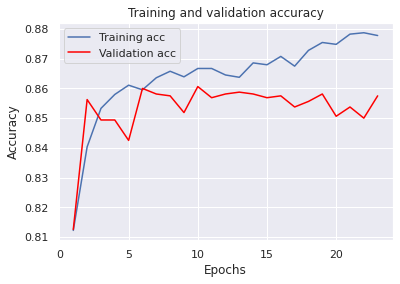

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8530
test loss: 0.350312739610672
test_accuracy: 0.8529999852180481


Text(0.5, 12.5, 'Predicted label')

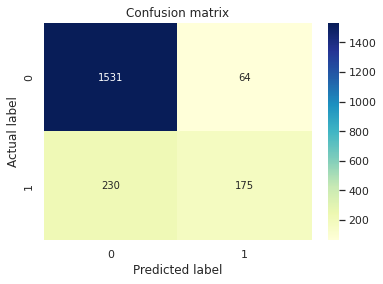

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.43      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



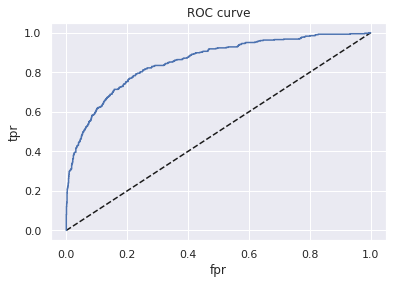

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()


In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8549959363752466

## 히든 레이어 5개

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 5ms/step - loss: 0.4331 - accuracy: 0.7892 - val_loss: 0.4082 - val_accuracy: 0.7969 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3845 - accuracy: 0.8281 - val_loss: 0.3858 - val_accuracy: 0.8313 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.8530 - val_loss: 0.3610 - val_accuracy: 0.8550 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3497 - accuracy: 0.8552 - val_loss: 0.3622 - val_accuracy: 0.8537 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.8595 - val_loss: 0.3575 - val_accuracy: 0.8494 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.8637 - val_loss: 0.3596 - val_accuracy: 0.8569 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3

In [ ]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1664      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trai

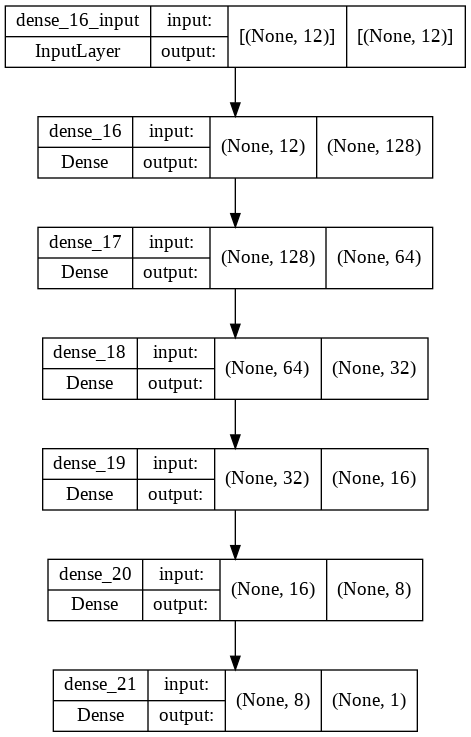

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)


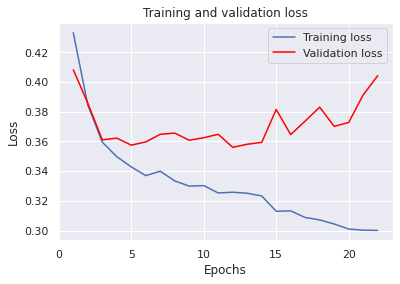

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

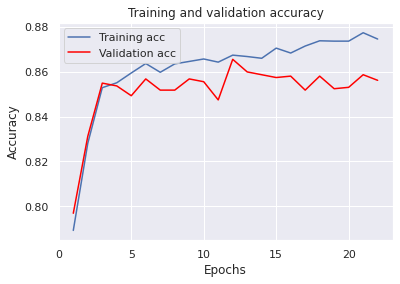

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8565
test loss: 0.3522340655326843
test_accuracy: 0.8565000295639038


Text(0.5, 12.5, 'Predicted label')

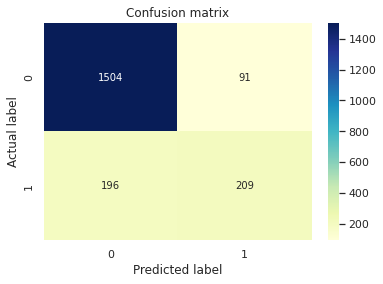

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.70      0.52      0.59       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



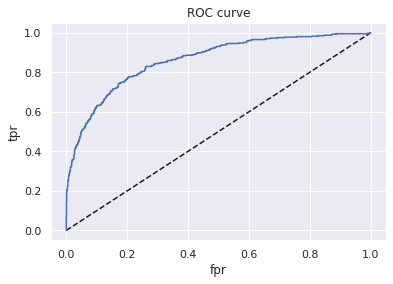

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8614412322458299




---



---


---



## 히든 레이어 3개

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
#network.add(layers.Dense(256, activation = 'relu'))
#network.add(layers.Dense(128, activation = 'relu'))
#network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 5ms/step - loss: 0.4357 - accuracy: 0.8166 - val_loss: 0.3969 - val_accuracy: 0.8319 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3624 - accuracy: 0.8512 - val_loss: 0.3642 - val_accuracy: 0.8556 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8552 - val_loss: 0.3649 - val_accuracy: 0.8525 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8595 - val_loss: 0.3591 - val_accuracy: 0.8456 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.8589 - val_loss: 0.3584 - val_accuracy: 0.8494 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.8627 - val_loss: 0.3578 - val_accuracy: 0.8544 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3

In [ ]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                416       
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


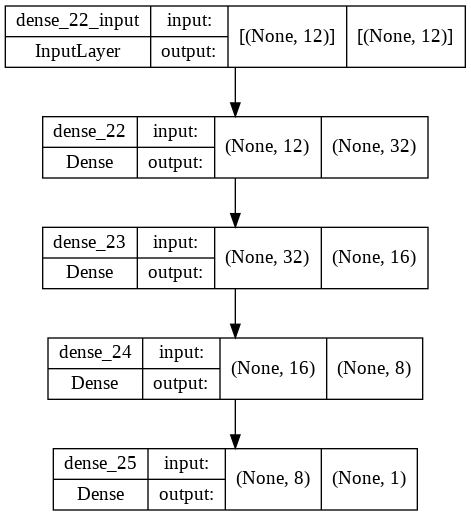

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

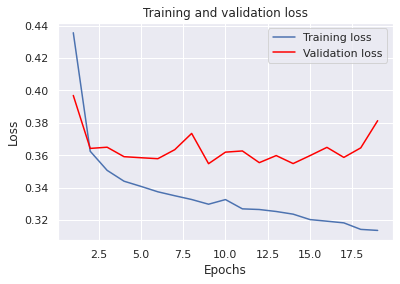

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

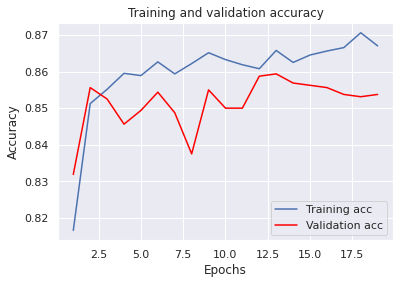

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8620
test loss: 0.3463435471057892
test_accuracy: 0.8619999885559082


Text(0.5, 12.5, 'Predicted label')

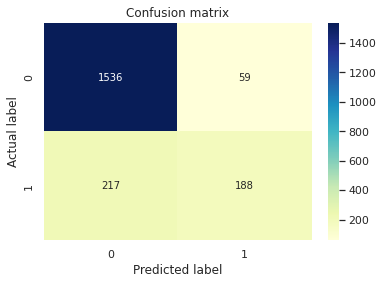

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.46      0.58       405

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



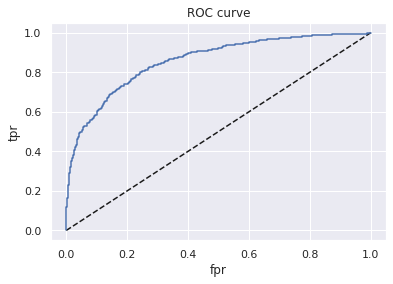

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8579325825302837



---



---



---



## 정해진 모델 batch size 최적화

In [ ]:
list = [8, 16, 32, 64, 128, 256]
for i in list:
  # Modeling
  cls_history = network.fit(X_train, y_train, epochs=100, batch_size=i, validation_split=0.2,
                          callbacks=[es, lr])
  
  y_pred = network.predict(X_test)
  y_pred = (y_pred > 0.5)

  test_loss, test_acc = network.evaluate(X_test, y_test)
  print('test loss:', test_loss)
  print('test_accuracy:', test_acc)

  print(classification_report(y_test,y_pred))

  print(roc_auc_score(y_test,y_pred_proba))

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3222 - accuracy: 0.8655 - val_loss: 0.3601 - val_accuracy: 0.8494 - lr: 0.0010
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3139 - accuracy: 0.8675 - val_loss: 0.3551 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 3/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3123 - accuracy: 0.8720 - val_loss: 0.3541 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3104 - accuracy: 0.8719 - val_loss: 0.3546 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3087 - accuracy: 0.8716 - val_loss: 0.3558 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3076 - accuracy: 0.8725 - val_loss: 0.3542 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 7/100
800/800 [==============================] - 2s 3ms/st

## RMSprop v/s Adam

## & 동시에 learning rate 찾기

In [ ]:
list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006]
for i in list:
  
  network.compile(optimizer=optimizers.RMSprop(learning_rate=i),
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

  # Modeling
  cls_history = network.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2,
                          callbacks=[es, lr])
  
  y_pred = network.predict(X_test)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_test, y_pred)

  test_loss, test_acc = network.evaluate(X_test, y_test)
  print('test loss:', test_loss)
  print('test_accuracy:', test_acc)

  print(classification_report(y_test,y_pred))

  print(roc_auc_score(y_test,y_pred_proba))

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3138 - accuracy: 0.8731 - val_loss: 0.3786 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3118 - accuracy: 0.8722 - val_loss: 0.3745 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3126 - accuracy: 0.8741 - val_loss: 0.3785 - val_accuracy: 0.8494 - lr: 0.0010
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3137 - accuracy: 0.8725 - val_loss: 0.3707 - val_accuracy: 0.8531 - lr: 0.0010
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3117 - accuracy: 0.8736 - val_loss: 0.3817 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3128 - accuracy: 0.8739 - val_loss: 0.3750 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 7/100
800/800 [==============================] - 2s 3ms/st

In [ ]:
list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006]
for i in list:
  
  network.compile(optimizer=optimizers.Adam(learning_rate=i),
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

  # Modeling
  cls_history = network.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2,
                          callbacks=[es, lr])
  
  y_pred = network.predict(X_test)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_test, y_pred)

  test_loss, test_acc = network.evaluate(X_test, y_test)
  print('test loss:', test_loss)
  print('test_accuracy:', test_acc)

  print(classification_report(y_test,y_pred))

  print(roc_auc_score(y_test,y_pred_proba))

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3192 - accuracy: 0.8703 - val_loss: 0.3667 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 2/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3094 - accuracy: 0.8761 - val_loss: 0.3678 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3068 - accuracy: 0.8772 - val_loss: 0.3617 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3043 - accuracy: 0.8800 - val_loss: 0.3596 - val_accuracy: 0.8606 - lr: 0.0010
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3016 - accuracy: 0.8809 - val_loss: 0.3658 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3005 - accuracy: 0.8820 - val_loss: 0.3628 - val_accuracy: 0.8562 - lr: 0.0010
Epoch 7/100
800/800 [==============================] - 2s 3ms/st



---



---



---



## 정해진 모델에 대한 구체적인 분석

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
#network.add(layers.Dense(128, activation = 'relu'))
#network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers

network.compile(optimizer=optimizers.Adam(learning_rate=0.005),
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4053 - accuracy: 0.8323 - val_loss: 0.3733 - val_accuracy: 0.8462 - lr: 0.0050
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3587 - accuracy: 0.8531 - val_loss: 0.3574 - val_accuracy: 0.8556 - lr: 0.0050
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3517 - accuracy: 0.8572 - val_loss: 0.3522 - val_accuracy: 0.8631 - lr: 0.0050
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3460 - accuracy: 0.8581 - val_loss: 0.3638 - val_accuracy: 0.8537 - lr: 0.0050
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3413 - accuracy: 0.8584 - val_loss: 0.3558 - val_accuracy: 0.8562 - lr: 0.0050
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3399 - accuracy: 0.8562 - val_loss: 0.3614 - val_accuracy: 0.8519 - lr: 0.0050
Epoch 7/100
800/800 [==============================] - 2s 3ms/st

In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-1.40630886e-01,  2.21430212e-01, -3.71150151e-02,
          1.79601863e-01,  8.63892883e-02,  3.10361031e-02,
         -1.26985028e-01, -1.73478410e-01, -1.07860684e-01,
         -4.29557599e-02, -1.33147463e-01,  1.52906716e-01,
         -1.37145564e-01, -1.86059222e-01,  3.04579407e-01,
         -2.86405720e-02,  1.24576591e-01, -4.18011874e-01,
          1.60733655e-01,  1.07481726e-01, -2.22089291e-01,
         -4.15497094e-01,  1.56374007e-01,  3.16367358e-01,
          4.25637811e-01, -6.34176703e-03, -1.93104759e-01,
         -4.68161032e-02,  6.76775351e-02,  1.67793669e-02,
          1.22561038e-01, -3.80214512e-01],
        [-8.48925710e-02, -1.71713263e-01,  2.27523185e-02,
          8.25259928e-03,  7.56125450e-02, -4.41990234e-02,
          2.21189652e-02, -3.33591074e-01, -1.41657889e-01,
         -1.34850800e-01,  1.60077482e-01, -8.41882899e-02,
         -7.45331571e-02, -8.80362815e-04, -1.54573575e-01,
         -1.12107977e-01,  1.30173728e-01, -1.72873333e-

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.140631,0.221430,-0.037115,0.179602,0.086389,0.031036,-0.126985,-0.173478,-0.107861,-0.042956,...,0.156374,0.316367,0.425638,-0.006342,-0.193105,-0.046816,0.067678,0.016779,0.122561,-0.380215
1,-0.084893,-0.171713,0.022752,0.008253,0.075613,-0.044199,0.022119,-0.333591,-0.141658,-0.134851,...,-0.239195,-0.614293,-0.276879,-0.077748,0.113815,-0.160492,-0.152535,0.221436,0.057700,-0.316940
2,-0.517050,0.772988,-0.394792,-0.513295,-0.071212,-0.171374,0.067981,-0.469283,0.502912,-0.379399,...,-0.063808,-0.767787,-0.431401,0.109993,-0.610900,0.367344,-0.186753,0.041858,-0.774050,0.882234
3,-0.119836,-0.163070,-0.242874,-0.099067,-0.063121,0.232382,-0.150853,0.239249,-0.029653,0.090731,...,-0.025627,-0.052237,0.181874,-0.008253,-0.102678,-0.006067,0.079557,0.010621,-0.212900,-0.217447
4,-0.549450,0.089236,-0.351262,-0.016464,0.073260,-0.070674,0.116937,0.129916,-0.056481,-0.175456,...,-0.129678,0.041182,-0.122639,0.349198,0.077180,-0.030905,-0.606867,0.108070,0.493836,-0.360656
5,0.938140,-0.169065,0.540595,-0.265867,0.048815,0.516742,0.879904,0.108735,-0.508426,0.100378,...,-0.493423,-0.038551,0.366218,1.011665,0.414643,0.041019,0.807329,0.691112,-0.156555,-0.310485
6,-0.352747,-0.020001,0.169129,-0.163255,-0.418663,0.048211,0.063409,-0.213795,0.039071,-0.106824,...,0.349812,0.259498,0.401548,-0.034868,0.448914,0.096816,-0.147900,-0.148708,0.176111,-0.098853
7,-0.025473,-0.039870,-0.291468,0.042017,-0.142727,0.035764,-0.227451,0.526181,-0.442166,0.216378,...,-0.368974,0.403727,0.217673,-0.070725,0.332147,0.654313,0.128231,-0.189744,-0.089431,0.625709
8,-0.156875,-0.116025,0.140532,-0.199332,-0.158817,0.063885,0.010699,0.012646,0.161425,-0.237447,...,0.028586,0.113542,0.407143,0.011597,0.115579,-0.096546,0.068343,0.092349,0.234178,0.052676
9,-0.088627,-0.268373,-0.345566,0.341778,-0.167982,-0.177521,0.138769,-0.149895,-0.066256,0.405164,...,-0.211066,-0.219016,0.272534,-0.043682,0.251283,0.242412,-0.099872,-0.145751,-0.198561,0.284658


In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

,0
0,0.152569
1,-0.084492
2,0.128349
3,-0.049473
4,-0.267571
5,-0.143500
6,-0.603411
7,0.266125
8,0.080535
9,0.168899


In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.170064,0.274831,-0.572061,-0.296162,0.408514,-0.270164,-0.164788,-0.241569,-0.318471,0.337178,-0.285661,0.199874,0.343413,0.475671,0.208748,-0.117536
1,0.112383,-0.356711,0.141132,-0.130450,-0.130719,-0.187003,-0.230084,0.265141,-0.300982,0.016405,0.161415,-0.311019,-0.306321,0.113941,-0.646185,-0.027411
2,-0.372877,-0.013607,-0.574546,0.064092,0.000519,0.248574,-0.135331,-0.032871,0.032449,0.171669,-0.363631,0.307462,-0.111643,0.324894,0.003453,-0.369398
3,0.070415,-0.191325,-0.303334,0.005536,0.118190,-0.012883,-0.211882,-0.151496,0.321398,-0.043539,-0.259517,0.358628,-0.204136,-0.323522,-0.379530,0.458705
4,0.297842,0.044819,-0.289583,-0.070689,-0.162376,0.137124,-0.032459,0.106468,0.189265,-0.141162,0.007726,0.327674,-0.147344,-0.065741,0.316991,0.031951
5,0.055638,0.137691,0.272379,0.116889,0.109949,-0.073799,-0.194085,-0.119343,0.032399,0.396432,0.076868,0.275391,-0.133356,0.056064,0.324737,0.224085
6,0.176076,-0.252041,-0.390605,-0.060514,-0.099283,-0.334075,0.293482,-0.231778,-0.022365,0.826389,0.148444,-0.112117,-0.368246,0.306313,0.307066,-0.020453
7,-0.289578,0.333160,-0.114981,-0.177017,0.119342,0.099016,-0.215962,-0.195837,-0.197145,-0.045173,0.099641,0.377163,0.276471,0.317512,0.002811,-0.067188
8,-0.044624,-0.275499,-0.035826,0.007493,0.078520,-0.211595,-0.241145,0.360358,-0.229502,-0.555288,0.366724,0.098037,-0.218496,-0.403638,-0.499197,-0.125202
9,-0.085033,0.034433,-0.658749,-0.021799,0.162149,-0.150891,-0.057743,-0.130305,-0.185640,-0.388108,-0.214897,0.330157,0.179060,0.106010,-0.061652,0.301266


In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

,0
0,-0.043173
1,0.162827
2,-0.373282
3,-0.161340
4,0.087900
5,0.006529
6,-0.171465
7,0.047406
8,0.034964
9,-0.675272


In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
cls_history.history

{'accuracy': [0.8323437571525574,
  0.8531249761581421,
  0.8571875095367432,
  0.8581249713897705,
  0.8584374785423279,
  0.856249988079071,
  0.8626562356948853,
  0.8634374737739563,
  0.8623437285423279,
  0.8639062643051147,
  0.862500011920929,
  0.8637499809265137,
  0.8650000095367432],
 'loss': [0.4052663743495941,
  0.3586738109588623,
  0.35167792439460754,
  0.3459799885749817,
  0.3412659764289856,
  0.33992913365364075,
  0.33984360098838806,
  0.3344871401786804,
  0.33415794372558594,
  0.3320733308792114,
  0.33073535561561584,
  0.3278391659259796,
  0.32744404673576355],
 'lr': [0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005],
 'val_accuracy': [0.8462499976158142,
  0.8556249737739563,
  0.8631250262260437,
  0.8537499904632568,
  0.856249988079071,
  0.8518750071525574,
  0.8550000190734863,
  0.8475000262260437,
  0.8568750023841858,
  0.8518750071525574,
  0.8600000143051147,
  0.8612499833106995,

참고 (ANN):

https://onesixx.com/optimizer-loss-metrics/

https://keras.io/ko/metrics/

https://talkingaboutme.tistory.com/entry/DL-%ED%95%B4%EB%B3%B4%EB%A9%B4%EC%84%9C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-ANN-%EA%B5%AC%ED%98%84-3

https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/

https://han-py.tistory.com/207

https://jackyoon5737.tistory.com/32

https://gomguard.tistory.com/187

https://blog.naver.com/qbxlvnf11/221449297033

https://wikidocs.net/32105

http://blog.naver.com/shwotjd14/221458224334

https://bioinformaticsandme.tistory.com/241

https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-4-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EB%B6%84%EB%A5%98-%EC%9D%B4%EC%A7%84-%EB%B6%84%EB%A5%98-%EC%98%88%EC%A0%9C/

https://codetorial.net/tensorflow/get_output_of_neuron_layers.html

https://codetorial.net/tensorflow/visualize_model.html

https://codetorial.net/tensorflow/visualize_training_history.html




https://wikidocs.net/44766

https://gooopy.tistory.com/80

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

https://ssongnote.tistory.com/10

- RBF
https://www.python2.net/questions-379561.htm